In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
data = pd.read_csv(r"C:\Users\mkalt\Desktop\Uni\Project\processed_data.csv", dtype = str)
my_data = data[["ReactionID", "Reaction", "Reagent", "Catalyst", "Solvent (Reaction Details)"]]
pd.set_option('display.max_rows', 200)
my_data.shape

(56399, 5)

In [3]:
my_data.to_csv(r"C:\Users\mkalt\Desktop\Uni\Project\my_data.csv")

In [4]:
#split all compounds in "Reagent" column to give one compound per row
reagents = my_data["Reagent"]
reagents_all = pd.DataFrame(data = reagents.str.split(pat = "; ", expand = False).explode().dropna())
reagents_all.sort_values("Reagent")

,Reagent
23873,"((+)-(1R)-[1,1'-binaphthalene]-2,2'-diylbis[di..."
14089,"((+)-(1R)-[1,1'-binaphthalene]-2,2'-diylbis[di..."
24016,"((+)-(1R)-[1,1'-binaphthalene]-2,2'-diylbis[di..."
12753,"((+)-(1R)-[1,1'-binaphthalene]-2,2'-diylbis[di..."
2836,"((-)-(1S)-[1,1'-binaphthalene]-2,2'-diylbis[di..."
...,...
14087,"{RuCl((R)-2,2-bis(diphenylphosphino)-1,1'-bina..."
12751,"{RuCl(C6H6)((S)-2,2'-bis(diphenylphosphino)-1,..."
24014,"{RuCl(C6H6)((S)-2,2'-bis(diphenylphosphino)-1,..."
14086,"{RuCl(C6H6)((S)-2,2'-bis(diphenylphosphino)-1,..."


In [5]:
#identify how many unique compounds there are in datset
print(reagents_all.duplicated().value_counts())

True     282397
False      1385
dtype: int64


In [6]:
#create new dataframe with no duplicates
reagents_dd = reagents_all.drop_duplicates()
reagents_dd.shape

(1385, 1)

In [7]:
#create new dataframe of heterogeneous catalysts based on containing certain substrings
hetero_catalysts = reagents_all[reagents_all['Reagent'].str.contains('%| on |-on-|/|contaminated', na = False)]
hetero_catalysts.sort_values("Reagent")

,Reagent
56317,0.7% Pd/C
37346,0.7% Pd/C
16476,0.7% Pd/C
37350,0.7% Pd/C
16478,0.7% Pd/C
...,...
45039,platinum on carbon
25499,rhodium contaminated with carbon
28163,rhodium contaminated with carbon
19642,rhodium on carbon


In [8]:
#identify all unique entries in dataframe
hetero_catalysts.drop_duplicates()

,Reagent
1,5%-palladium/activated carbon
36,5% rhodium-on-charcoal
70,palladium 10% on activated carbon
262,20% palladium hydroxide on charcoal
273,5% active carbon-supported ruthenium
300,palladium on activated charcoal
468,10 wt% Pd(OH)2 on carbon
588,"Mg-Al Hydrotalcite (HT, Mg/Al = 5.4)"
814,20 % Pd(OH)2/C
848,5% Pd(II)/C(eggshell)


In [9]:
#drop the few remaining rows containing non-heterogeneous catalysts
hetero_catalysts = hetero_catalysts[hetero_catalysts["Reagent"].str.contains("Amberlite|oleum|ase|Chiral")==False]
hetero_catalysts

#10560 heterogeneous catalysts in dataset

,Reagent
1,5%-palladium/activated carbon
22,5%-palladium/activated carbon
23,5%-palladium/activated carbon
36,5% rhodium-on-charcoal
37,5% rhodium-on-charcoal
...,...
56312,10% Pt/activated carbon
56314,0.7% Pd/C
56315,5%-palladium/activated carbon
56316,5%-palladium/activated carbon


In [10]:
#create new dataframe with no duplicates
hetero_catalysts_dd = hetero_catalysts.drop_duplicates()
hetero_catalysts_dd.to_excel(r"C:\Users\mkalt\Desktop\Uni\Project\hetero_catalysts.xlsx")
hetero_catalysts_dd.shape

(60, 1)

In [11]:
#create new reagents list without heterogeneous catalysts 
reagents_1 = pd.concat([reagents_dd, hetero_catalysts_dd]).drop_duplicates(keep=False)
reagents_1

,Reagent
0,sodium hydroxide
2,sodium hypochlorite
2,potassium phosphate
2,potassium bromide
3,"1,2-di(benzylidene)hydrazine"
...,...
55772,Montmorillonite K10 clay
55942,1-Methylpyrrolidine
56002,n-Butyl chloride
56026,chloro(cyclopentadienyl)bis(triphenylphosphine...


In [12]:
#adjust heterogeneous catalyst dataframe to account for different wording of the same catalyst
hetero_catalysts['Reagent'] = hetero_catalysts['Reagent'].replace({'10% palladium on activated carbon':'10% Pd/C',
                                                                  "palladium 10% on activated carbon":"10% Pd/C",
                                                                  'palladium on activated carbon':'Pd/C',
                                                                  "5%-palladium/activated carbon":"5% Pd/C",
                                                                  'palladium on carbon':'Pd/C',
                                                                  'palladium on activated charcoal':'Pd/C',
                                                                  '20% palladium hydroxide on charcoal':'20 % Pd(OH)2/C',
                                                                  "20% palladium hydroxide-activated charcoal":"20 % Pd(OH)2/C",
                                                                  "10% Pd(OH)2 on C":"10 % Pd(OH)2/C",
                                                                  "10% palladium hydroxide on charcoal":"10 % Pd(OH)2/C",
                                                                  "20% palladium hydroxide on carbon":"20 % Pd(OH)2/C",
                                                                  "20 wt.% Pd(OH)2 on activated carbon":"20 % Pd(OH)2/C",
                                                                  "10 wt% Pd(OH)2 on carbon":"10 % Pd(OH)2/C",
                                                                  '10% palladium on activated charcoal':'10% Pd/C',
                                                                  'platinum on activated charcoal':'platinum on carbon',
                                                                  '5% active carbon-supported ruthenium':'5% Ru/C',
                                                                  '5 wt% ruthenium/carbon':'5% Ru/C',
                                                                  "[1,3-bis-(2,6-diisopropylphenyl)-4-((4-ethyl-4-methylpiperazin-4-ium-1-yl)methyl)-2-imidazolidinylidene]dichloro(O-isopropoxyphenylmethylene)ruthenium chloride/SBA-15":"dichloro ruthenium complex/SBA-15"})


In [13]:
hetero_catalysts_dd_2 = hetero_catalysts.drop_duplicates()
hetero_catalysts_dd_2.shape
#47 unique heterogeneous catalysts

(47, 1)

In [14]:
#create list of unique catalysts to create "groups"
hc_list = hetero_catalysts_dd_2["Reagent"].tolist() 

In [15]:
#assign each row an index matching that of it's group in the list (plus 1) 
hetero_catalysts['duplication_index'] = hetero_catalysts["Reagent"].apply(lambda x: hc_list.index(x) + 1)
hetero_catalysts = hetero_catalysts.sort_values("duplication_index")
hetero_catalysts

,Reagent,duplication_index
1,5% Pd/C,1
18497,5% Pd/C,1
18499,5% Pd/C,1
18500,5% Pd/C,1
18501,5% Pd/C,1
...,...,...
50776,1% platinum on charcoal,44
50766,2 wt% Pd/C,45
55378,Cu/Al2O3,46
55627,Au-Pd/TiO2,47


In [16]:
#group together the catalysts by their name and count the frequency of their duplication index
hetero_catalysts_f = hetero_catalysts.groupby(['Reagent'])['duplication_index'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
hetero_catalysts_f

,Reagent,Count
9,10% Pd/C,5005
22,5% Pd/C,2945
35,Pd/C,1478
14,20 % Pd(OH)2/C,366
44,platinum on carbon,123
21,5% Pd(II)/C(eggshell),122
7,10 % Pd(OH)2/C,118
33,Pd(OH)2/C (50% w/w),112
1,1 % platinum and 2% vanadium on carbon,84
11,10% Pt/activated carbon,51


In [17]:
#standardise element names for easier processing
hetero_catalysts_f.to_excel(r"C:\Users\mkalt\Desktop\Uni\Project\Heterogenous Catalysts.xlsx")

hetero_catalysts_f['Reagent'] = hetero_catalysts_f['Reagent'].replace({"platinum":"Pt",
                                                                       "vanadium":"V",
                                                                       "ruthenium":"Ru",
                                                                       "copper":"Cu",
                                                                       "iridium":"Ir",
                                                                       "palladium":"Pd",
                                                                       "rhodium":"Rh"}, regex = True)
hetero_catalysts_f

,Reagent,Count
9,10% Pd/C,5005
22,5% Pd/C,2945
35,Pd/C,1478
14,20 % Pd(OH)2/C,366
44,Pt on carbon,123
21,5% Pd(II)/C(eggshell),122
7,10 % Pd(OH)2/C,118
33,Pd(OH)2/C (50% w/w),112
1,1 % Pt and 2% V on carbon,84
11,10% Pt/activated carbon,51


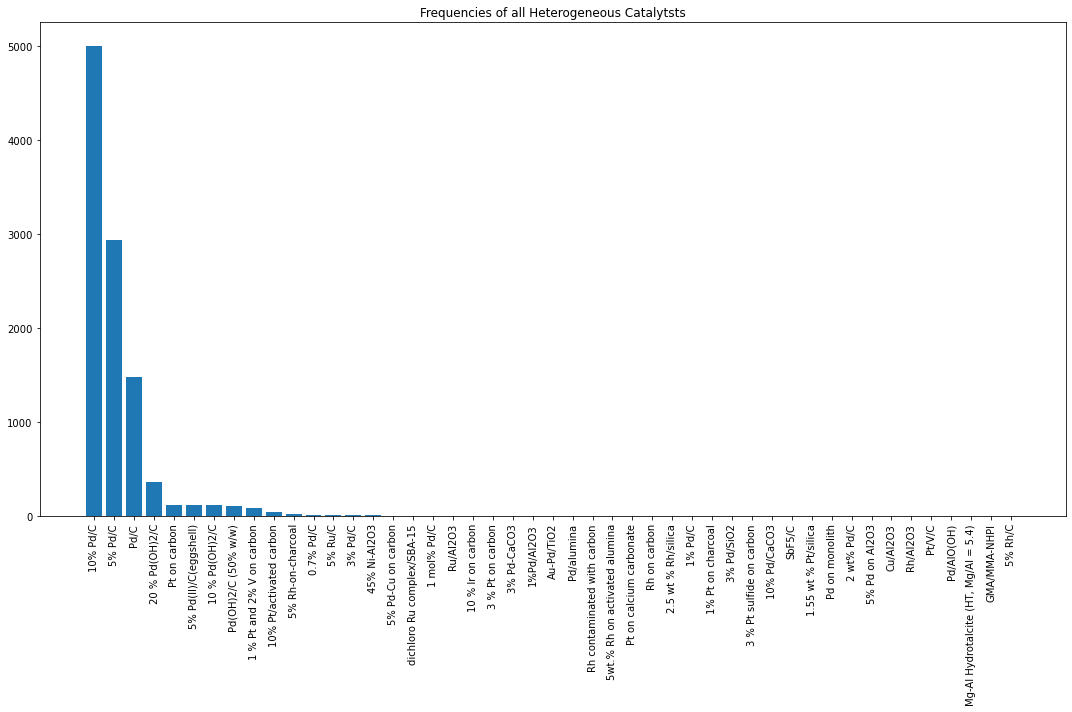

In [18]:
#create bar chart showing the frequency of each heterogeneous catalyst in the dataset
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(hetero_catalysts_f["Reagent"], hetero_catalysts_f["Count"])
plt.xticks(rotation = 90)
plt.title("Frequencies of all Heterogeneous Catalytsts")
plt.tight_layout()
plt.savefig(r"C:\Users\mkalt\Desktop\Uni\Project\het_cat_f.png")
plt.show()

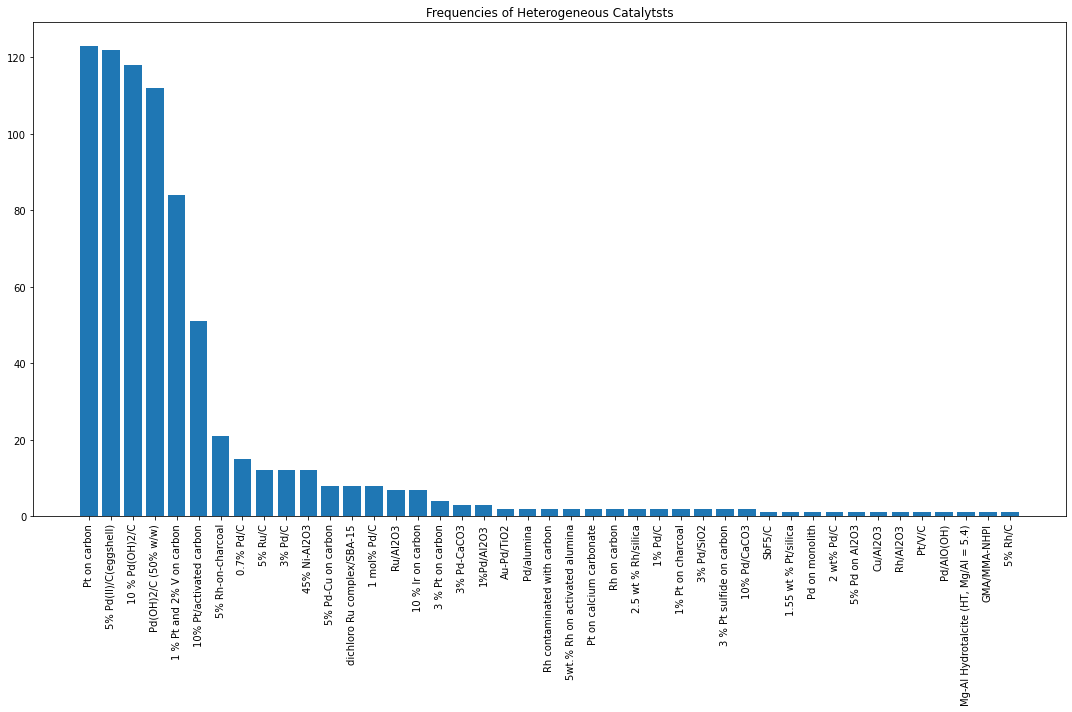

In [19]:
#remove the top four Pd catalysts which overwhelm the data
hetero_catalysts_drop = hetero_catalysts_f.drop([hetero_catalysts_f.index[0],
                                                 hetero_catalysts_f.index[1], 
                                                 hetero_catalysts_f.index[2],
                                                 hetero_catalysts_f.index[3]])

fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(hetero_catalysts_drop["Reagent"], hetero_catalysts_drop["Count"])
plt.xticks(rotation = 90)
plt.title("Frequencies of Heterogeneous Catalytsts")
plt.tight_layout()
plt.savefig(r"C:\Users\mkalt\Desktop\Uni\Project\het_cat_f2.png")
plt.show()

In [20]:
elements = ["Pd", "Pt", "V", "Rh", "Ru", "Ni", "Cu", "Au", "Sb", "Ir"]
frequency = []
for x in elements:
    y = hetero_catalysts_f["Reagent"].str.count(x).sum()
    frequency.append(y)
    
element_f = {"Elements" : elements, "Frequency" : frequency}
element_f = pd.DataFrame(element_f).sort_values("Frequency", ascending = False)
element_f

,Elements,Frequency
0,Pd,22
1,Pt,9
3,Rh,7
4,Ru,3
2,V,2
6,Cu,2
5,Ni,1
7,Au,1
8,Sb,1
9,Ir,1


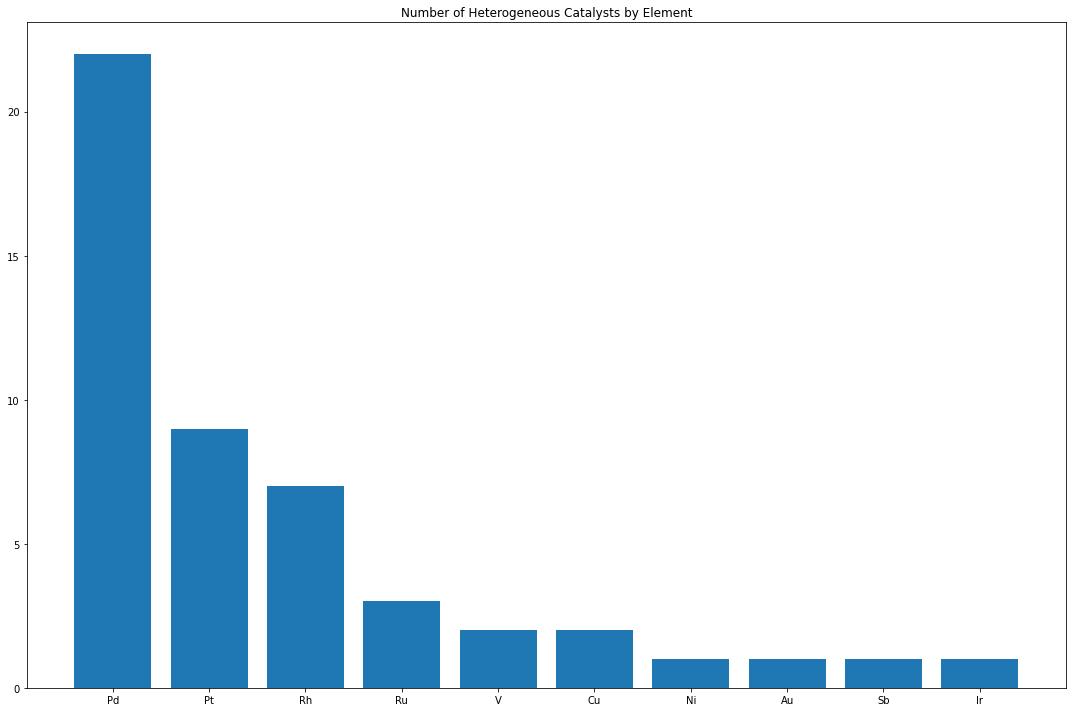

In [75]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(element_f["Elements"], element_f["Frequency"])
plt.title("Number of Heterogeneous Catalysts by Element")
plt.tight_layout()
plt.savefig(r"C:\Users\mkalt\Desktop\Uni\Project\het_cat_ele.png")
plt.show()

In [22]:
#use excel to find which reaction using hetergeneous palladium are hydrogenolysis
hetero_catalysts_f.to_excel(r"C:\Users\mkalt\Desktop\Uni\Project\hetero_pd.xlsx")


In [23]:
hetero_pd = pd.read_excel(r"C:\Users\mkalt\Desktop\Uni\Project\heterogeneous_pd.xlsx", dtype = str)
hetero_pd = hetero_pd.iloc[:, 0].to_list()
hetero_pd

['palladium 10% on activated carbon',
 '20% palladium hydroxide on charcoal',
 'palladium on activated charcoal',
 '10 wt% Pd(OH)2 on carbon',
 '20 % Pd(OH)2/C',
 '5% Pd(II)/C(eggshell)',
 '20% palladium hydroxide-activated charcoal',
 '5% Pd/C',
 'palladium on monolith',
 '10% Pd/CaCO3',
 'Pd(OH)2/C (50% w/w)',
 '5% palladium-copper on carbon',
 'palladium/alumina',
 '10% palladium hydroxide on charcoal',
 '1% Pd/C',
 '10% palladium on activated carbon',
 '10% Pd/C',
 '0.7% Pd/C',
 '3% Pd/C',
 '20% palladium hydroxide on carbon',
 '10% Pd(OH)2 on C',
 '10% palladium on activated charcoal',
 '5% palladium on Al2O3',
 'palladium on carbon',
 '20 wt.% Pd(OH)2 on activated carbon',
 '1 mol% Pd/C',
 '1%Pd/Al2O3',
 'Pd/AlO(OH)',
 '3% Pd-CaCO3',
 '3% Pd/SiO2',
 '2 wt% Pd/C',
 'Au-Pd/TiO2']

In [24]:
reactions = data[["Reaction", "Reagent"]]
reactions_pd = reactions[reactions['Reagent'].str.contains('|'.join(hetero_pd), na = False)]
reactions_pd

C:\Users\mkalt\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Reaction,Reagent
70,[Br-].CCOC(=O)CCCOC1=C(C=CC(=O)OCC)C(C[P+](C2=...,n-butyllithium; palladium 10% on activated car...
71,[Br-].CCOC(=O)CCCOC1=C(C=CC(=O)OCC)C(C[P+](C2=...,carbon tetrabromide; palladium 10% on activate...
72,[Br-].CCOC(=O)CCCOC1=C(C=CC(=O)OCC)C(C[P+](C2=...,carbon tetrabromide; palladium 10% on activate...
73,[Br-].CCOC(=O)CCCOC1=C(C=CC(=O)OCC)C(C[P+](C2=...,ethyloxirane; carbon tetrabromide; palladium 1...
74,[Br-].CCOC(=O)CCCOC1=C(C=CC(=O)OCC)C(C[P+](C2=...,palladium 10% on activated carbon; hydrogen
...,...,...
56115,OCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCC1=CC=CC...,palladium 10% on activated carbon; hydrogen; s...
56116,OCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCC1=CC=CC...,palladium 10% on activated carbon; hydrogen; s...
56134,ON=C1CCC2=CC=CC=C12>>NC1CCC2=C1C=CC=C2,palladium 10% on activated carbon; hydrogen
56314,OP(O)(O)=O.COC(=O)N1CCNCC1>>Cl.COC(=O)N1CCN(CC...,hydrogenchloride; 0.7% Pd/C; hydrogen; N-ethyl...


In [25]:
reactions_pd_2 = pd.DataFrame(data = reactions_pd["Reaction"].str.split(pat = ">>", expand = False).explode().reset_index().dropna())
reactions_pd_2.to_excel(r"C:\Users\mkalt\Desktop\Uni\Project\reactions_pd_2.xlsx")
reactions_pd_2

,index,Reaction
0,70,[Br-].CCOC(=O)CCCOC1=C(C=CC(=O)OCC)C(C[P+](C2=...
1,70,CCOC(=O)CCCOC1=C(CCC(=O)OCC)C(CCCCCCBr)=CC=C1
2,71,[Br-].CCOC(=O)CCCOC1=C(C=CC(=O)OCC)C(C[P+](C2=...
3,71,CCOC(=O)CCCOC1=C(CCC(=O)OCC)C(CCCCCCBr)=CC=C1
4,72,[Br-].CCOC(=O)CCCOC1=C(C=CC(=O)OCC)C(C[P+](C2=...
...,...,...
13243,56134,NC1CCC2=C1C=CC=C2
13244,56314,OP(O)(O)=O.COC(=O)N1CCNCC1
13245,56314,Cl.COC(=O)N1CCN(CC2=CC=CC(NC(=O)NC3=CC=C(C)N=C...
13246,56317,OP(O)(O)=O.COC(=O)N1CCNCC1


In [26]:
products = reactions_pd_2.iloc[1::2]
products

,index,Reaction
1,70,CCOC(=O)CCCOC1=C(CCC(=O)OCC)C(CCCCCCBr)=CC=C1
3,71,CCOC(=O)CCCOC1=C(CCC(=O)OCC)C(CCCCCCBr)=CC=C1
5,72,CCOC(=O)CCCOC1=C(CCC(=O)OCC)C(CCCCCCBr)=CC=C1
7,73,CCOC(=O)CCCOC1=C(CCC(=O)OCC)C(CCCCCCBr)=CC=C1
9,74,CCOC(=O)CCCOC1=C(CCC(=O)OCC)C(CCCCCCO)=CC=C1
...,...,...
13239,56115,COCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCO
13241,56116,COCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOS(=O)(=O...
13243,56134,NC1CCC2=C1C=CC=C2
13245,56314,Cl.COC(=O)N1CCN(CC2=CC=CC(NC(=O)NC3=CC=C(C)N=C...


In [27]:
#??????
hydrogenolysis = products[products["Reaction"].str.contains("C1=CC=CC=C1")]
hydrogenolysis

,index,Reaction
121,300,C[C@H](NC(=O)N1CCC(CC1)C1=C(O)C=C(O)C=C1)C1=CC...
283,1403,[H][C@@]12CNC[C@]1([H])C(=O)N(CC1=CC=CC=C1)C2=O
285,1404,[H][C@@]12CNC[C@]1([H])CN(CC1=CC=CC=C1)C2
291,1407,OC(=O)C(CC1=CC=CC=C1)C(O)=O.[H][C@@]12CNC[C@]1...
293,1408,OC(=O)C(CC1=CC=CC=C1)C(O)=O.[H][C@@]12CNC[C@]1...
...,...,...
12983,54569,COC1=C2OC(=CC(=O)C2=C(O)C=C1O)C1=CC=CC=C1
13113,55266,N[C@@H](CC1=CC=CC=C1)C(O)=O.CCC1=CC=C(CC2=CC(=...
13115,55267,N[C@@H](CC1=CC=CC=C1)C(O)=O.CCC1=CC=C(CC2=CC=C...
13145,55617,[H]C(=O)C1=CC=CC=C1.CC1=CC=CC=C1


In [28]:
#extract rows containing "ase" which signifies enzymes
enzymes = reagents_all[reagents_all['Reagent'].str.contains('ase', na = False)]

#create list with no duplicates
enzymes.drop_duplicates()

,Reagent
2225,base
4437,glucose dehydrogenase
4437,ketoreductase 116
4438,ketoreductase 115
6407,based on styrene-divinylbenzene matrix) preact...
9196,pancreatin lipase
9403,Lipase PS Amano
9404,Lipase PS ?Amano? SD
9406,Thermomyces lanuginosus lipase (Novozym TL IM)
13576,porcine pancreatic lipase


In [29]:
#drop rows containing common words such as "phase" and "base"
enzymes = enzymes[enzymes["Reagent"].str.contains("phase|base")==False]
enzymes.shape
#172 enzymatic catalysts in dataset

(172, 1)

In [30]:
enzymes_dd = enzymes.drop_duplicates()
enzymes_dd.shape
#22 unique enzymes in dataset

(22, 1)

In [31]:
#create new reagents list without heterogeneous or enzymatic catalysts 
reagents_2 = pd.concat([reagents_1, enzymes_dd]).drop_duplicates(keep=False)

In [32]:
enzymes['Reagent'] = enzymes['Reagent'].replace({"Escherichia coli M15/BCJ2315 harboring the nitrilase BCJ2315 from Burkholderia cenocepacia J2315 wet cells":"nitrilase BCJ2315"})

In [33]:
enzymes_dd_2 = enzymes.drop_duplicates()

In [34]:
en_list = enzymes_dd_2["Reagent"].tolist() #create list of unique catalysts to create "groups"

In [35]:
#assign each row an index matching that of it's group in the list (plus 1) 
enzymes['duplication_index'] = enzymes["Reagent"].apply(lambda x: en_list.index(x) + 1)
enzymes = enzymes.sort_values("duplication_index")
enzymes

,Reagent,duplication_index
4437,glucose dehydrogenase,1
18733,glucose dehydrogenase,1
18732,glucose dehydrogenase,1
18731,glucose dehydrogenase,1
19805,glucose dehydrogenase,1
19806,glucose dehydrogenase,1
19807,glucose dehydrogenase,1
29473,glucose dehydrogenase,1
29474,glucose dehydrogenase,1
29475,glucose dehydrogenase,1


In [36]:
#group together the enzymes by their name and count the frequency of their duplication index
enzymes_f = enzymes.groupby(['Reagent'])['duplication_index'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
enzymes_f

,Reagent,Count
10,glucose dehydrogenase 105,36
15,ketoreductase NADH-112,35
9,glucose dehydrogenase,27
21,porcine pancreatic lipase,15
14,ketoreductase 116,13
13,ketoreductase 115,13
4,Lipase PS Amano,10
11,glucose dehydrogenase GDH-CDX-901,5
7,enoate reductase C26D-YqjM,3
8,enoate reductase ERED-H7,2


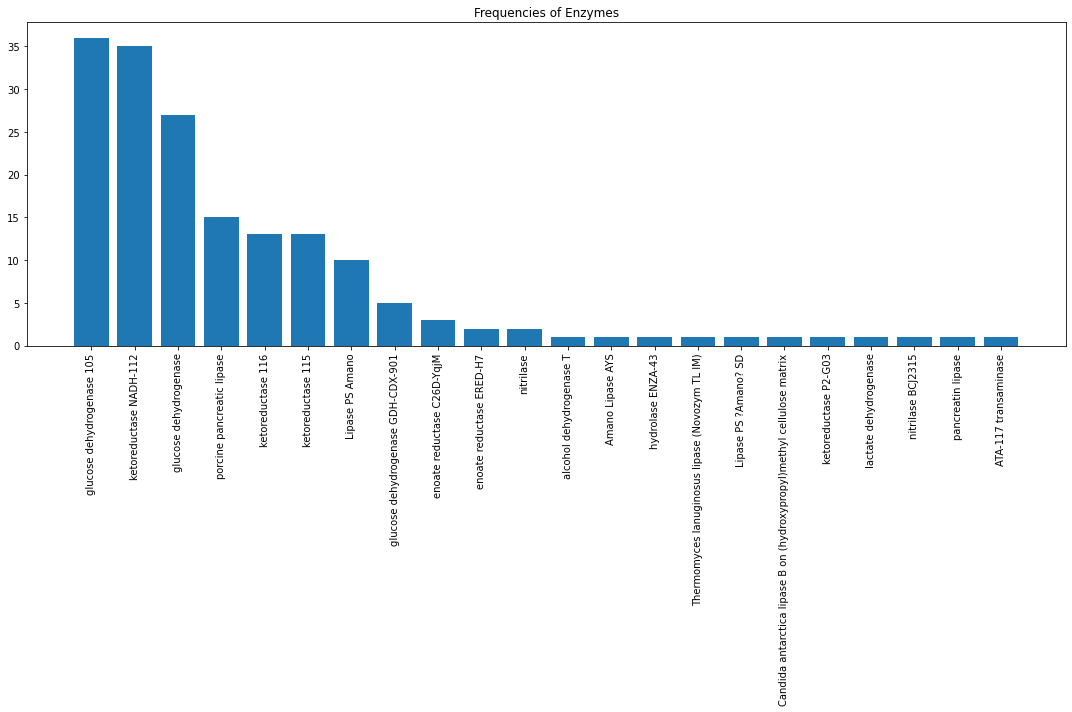

In [37]:
#create bar chart showing the frequency of each heterogeneous catalyst in the dataset
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(enzymes_f["Reagent"], enzymes_f["Count"])
plt.xticks(rotation = 90)
plt.title("Frequencies of Enzymes")
plt.tight_layout()
plt.savefig(r"C:\Users\mkalt\Desktop\Uni\Project\enzyme_f.png")
plt.show()

In [38]:
classes = ["dehydrogenase", "transferase", "hydrolase", "lyase", "isomerase", "ligase", "reductuase"]
enzymes_f["Class"] = [classes[0],
                      classes[6],
                      classes[0],
                      classes[2],
                      classes[6],
                      classes[6],
                      classes[2],
                      classes[0],
                      classes[6],
                      classes[2],
                      classes[6],
                      classes[2],
                      classes[2],
                      classes[2],
                      classes[0],
                      classes[6],
                      classes[2],
                      classes[2],
                      classes[2],
                      classes[0],
                      classes[2],
                      classes[1],
                      
]
enzymes_f

,Reagent,Count,Class
10,glucose dehydrogenase 105,36,dehydrogenase
15,ketoreductase NADH-112,35,reductuase
9,glucose dehydrogenase,27,dehydrogenase
21,porcine pancreatic lipase,15,hydrolase
14,ketoreductase 116,13,reductuase
13,ketoreductase 115,13,reductuase
4,Lipase PS Amano,10,hydrolase
11,glucose dehydrogenase GDH-CDX-901,5,dehydrogenase
7,enoate reductase C26D-YqjM,3,reductuase
8,enoate reductase ERED-H7,2,hydrolase


In [39]:
#use pivot table to count total freqency of each class in dataset
enzymes_f.to_excel(r"C:\Users\mkalt\Desktop\Uni\Project\enzymes.xlsx")

In [40]:
#convert to dataframe
enzymes_c = pd.read_csv(r"C:\Users\mkalt\Desktop\Uni\Project\enzymes.csv", dtype = str)
enzymes_c

,Class,Frequency
0,dehydrogenase,70
1,hydrolase,34
2,reductase,67
3,transferase,1


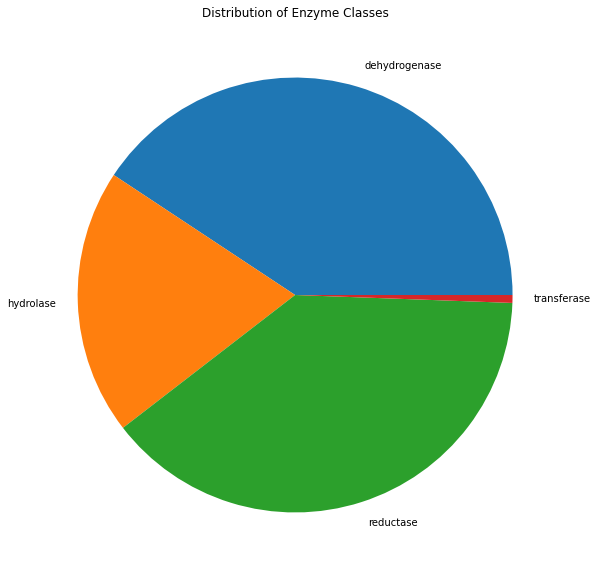

In [41]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.pie(enzymes_c["Frequency"], labels = enzymes_c["Class"])
plt.title("Distribution of Enzyme Classes")
plt.savefig(r"C:\Users\mkalt\Desktop\Uni\Project\en_class.png")
plt.show()

In [42]:
#extract palladium organometallic catalysts
organo_catalysts_pd = reagents_all[reagents_all['Reagent'].str.contains('palladium|Pd', na = False)]
organo_catalysts_pd.sort_values("Reagent")

#drop rows containing non-organometallic catalysts
organo_catalysts_pd = organo_catalysts_pd[organo_catalysts_pd["Reagent"].str.contains('%| on |-on-|/|catalyst|hydroxide')==False]

#removes the row containing just "palladium", which is not an organometallic catalyst
organo_catalysts_pd = organo_catalysts_pd[organo_catalysts_pd["Reagent"].str.fullmatch(
                        'palladium|palladium dichloride')==False]
organo_catalysts_pd

,Reagent
85,palladium diacetate
86,palladium diacetate
87,palladium diacetate
88,palladium diacetate
112,palladium diacetate
...,...
56166,palladium diacetate
56167,palladium diacetate
56168,palladium diacetate
56171,palladium diacetate


In [43]:
organo_catalysts_pd_dd = organo_catalysts_pd.drop_duplicates()
organo_catalysts_pd_dd.shape
#64 unique palladium organometallic catalyst

(64, 1)

In [44]:
#create new reagents list without heterogeneous, enzymatic, or Pd organometallic catalysts 
reagents_3 = pd.concat([reagents_2, organo_catalysts_pd_dd]).drop_duplicates(keep=False)
reagents_3.to_excel(r"C:\Users\mkalt\Desktop\Uni\Project\reagents_3.xlsx")

In [45]:
pd_list = organo_catalysts_pd_dd["Reagent"].tolist() #create list of unique catalysts to create "groups"

#assign each row an index matching that of it's group in the list (plus 1) 
organo_catalysts_pd['duplication_index'] = organo_catalysts_pd["Reagent"].apply(lambda x: pd_list.index(x) + 1)
organo_catalysts_pd = organo_catalysts_pd.sort_values("duplication_index")
organo_catalysts_pd

organo_catalysts_pd_f = organo_catalysts_pd.groupby(['Reagent'])['duplication_index'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
organo_catalysts_pd_f = organo_catalysts_pd_f.head(10)
organo_catalysts_pd_f

,Reagent,Count
54,palladium diacetate,3154
38,bis-triphenylphosphine-palladium(II) chloride,1136
0,"(1,1'-bis(diphenylphosphino)ferrocene)palladiu...",700
58,tetrakis(triphenylphosphine) palladium(0),687
46,"dichloro(1,1'-bis(diphenylphosphanyl)ferrocene...",601
62,tris-(dibenzylideneacetone)dipalladium(0),504
48,"dichloro[1,1'-bis(di-t-butylphosphino)ferrocen...",369
34,bis(eta3-allyl-mu-chloropalladium(II)),225
1,"(1,2-bis(diphenylphosphanyl)ethane)dichloridop...",221
32,bis(di-tert-?butyl(4-?dimethylaminophenyl)?pho...,198


In [46]:
#extract rhodium organometallic catalysts
organo_catalysts_rh = reagents_all[reagents_all['Reagent'].str.contains('rhodium|Rh', na = False)]
organo_catalysts_rh.sort_values("Reagent")

#drop rows containing non-organometallic catalysts
organo_catalysts_rh = organo_catalysts_rh[organo_catalysts_rh["Reagent"].str.contains(
                        '%| on |-on-|/|contaminated|trichloride hydrate')==False]

#removes the row containing just "rhodium", which is not an organometallic catalyst
organo_catalysts_rh = organo_catalysts_rh[organo_catalysts_rh["Reagent"].str.fullmatch(
                        'rhodium')==False]
organo_catalysts_rh

,Reagent
120,(acetylacetonato)dicarbonylrhodium (l)
121,dichloro(pentamethylcyclopentadienyl)rhodium (...
122,dichloro(pentamethylcyclopentadienyl)rhodium (...
123,dichloro(pentamethylcyclopentadienyl)rhodium (...
124,dichloro(pentamethylcyclopentadienyl)rhodium (...
...,...
55549,"[((R,R)-DIPAMP)Rh(COD)]BF4"
56241,dichloro(pentamethylcyclopentadienyl)rhodium (...
56242,dichloro(pentamethylcyclopentadienyl)rhodium (...
56243,dichloro(pentamethylcyclopentadienyl)rhodium (...


In [47]:
organo_catalysts_rh_dd = organo_catalysts_rh.drop_duplicates()
organo_catalysts_rh_dd.shape
#29 unique rhodium organometallic catalyst

(29, 1)

In [48]:
#create new reagents list without heterogeneous, enzymatic, or Pd/Rh organometallic catalysts 
reagents_4 = pd.concat([reagents_3, organo_catalysts_rh_dd]).drop_duplicates(keep=False)
reagents_4.to_excel(r"C:\Users\mkalt\Desktop\Uni\Project\reagents_4.xlsx")

In [49]:
rh_list = organo_catalysts_rh_dd["Reagent"].tolist() #create list of unique catalysts to create "groups"

#assign each row an index matching that of it's group in the list (plus 1) 
organo_catalysts_rh['duplication_index'] = organo_catalysts_rh["Reagent"].apply(lambda x: rh_list.index(x) + 1)
organo_catalysts_rh = organo_catalysts_rh.sort_values("duplication_index")

organo_catalysts_rh_f = organo_catalysts_rh.groupby(['Reagent'])['duplication_index'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
organo_catalysts_rh_f = organo_catalysts_rh_f.head(10)
organo_catalysts_rh_f

,Reagent,Count
3,"(R)-(-)-4,12-bis(diphenylphosphino)[2.2]paracy...",487
18,"bis(1,5-cyclooctadiene)rhodium(I) tetrafluorob...",102
25,dirhodium tetraacetate,51
20,bis(norbornadiene)rhodium(l)tetrafluoroborate,50
1,"(-)-1,2-bis-[(2R,5R)-2,5-diethylphospholano]be...",45
4,"(S,S)-Et-DuPHOS-Rh",39
14,[(S)-PhanePhosRhCOD]BF4,37
24,dichloro(pentamethylcyclopentadienyl)rhodium (...,36
10,Rh2[(N-(4-dodecylphenyl)sulfonyl)-(S)-prolinate]4,34
23,dicarbonylacetylacetonato rhodium (I),26


In [50]:
#extract platinum organometallic catalysts
organo_catalysts_pt = reagents_all[reagents_all['Reagent'].str.contains('platinum|Pt', na = False)]
organo_catalysts_pt.sort_values("Reagent")

organo_catalysts_pt_dd = organo_catalysts_pt.drop_duplicates()
organo_catalysts_pt_dd

,Reagent
313,platinum(IV) oxide
2728,platinum on activated charcoal
3058,10% Pt/activated carbon
3327,1 % platinum and 2% vanadium on carbon
4417,platinum on carbon
24379,3 % platinum on carbon
32750,platinum
35273,platinum(IV) chloride
38727,Pt/V/C
40102,1.55 wt % Pt/silica


In [51]:
#no platinum organometallic catalysts

In [52]:
#create new reagents list 
reagents_5 = pd.concat([reagents_4, organo_catalysts_pt_dd]).drop_duplicates(keep=False)
reagents_5

,Reagent
0,sodium hydroxide
2,sodium hypochlorite
2,potassium phosphate
2,potassium bromide
3,"1,2-di(benzylidene)hydrazine"
...,...
38727,Pt/V/C
40102,1.55 wt % Pt/silica
43888,3 % platinum sulfide on carbon
45527,platinum on calcium carbonate


In [53]:
#extract organometallic catalysts
organo_catalysts_ru = reagents_all[reagents_all['Reagent'].str.contains('ruthenium|Ru', na = False)]
organo_catalysts_ru.sort_values("Reagent")

#drop rows containing non-organometallic catalysts
organo_catalysts_ru = organo_catalysts_ru[organo_catalysts_ru["Reagent"].str.contains('%| on |-on-|/|catalyst|hydroxide|carbon')==False]
organo_catalysts_ru = organo_catalysts_ru[organo_catalysts_ru["Reagent"].str.fullmatch(
                        'ruthenium(III) chloride trihydrate|ruthenium trichloride')==False]

organo_catalysts_ru_dd = organo_catalysts_ru.drop_duplicates()
organo_catalysts_ru_dd.shape

(53, 1)

In [54]:
reagents_6 = pd.concat([reagents_5, organo_catalysts_ru_dd]).drop_duplicates(keep=False)

In [55]:
ru_list = organo_catalysts_ru_dd["Reagent"].tolist() #create list of unique catalysts to create "groups"

#assign each row an index matching that of it's group in the list (plus 1) 
organo_catalysts_ru['duplication_index'] = organo_catalysts_ru["Reagent"].apply(lambda x: ru_list.index(x) + 1)
organo_catalysts_ru = organo_catalysts_ru.sort_values("duplication_index")

organo_catalysts_ru_f = organo_catalysts_ru.groupby(['Reagent'])['duplication_index'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
organo_catalysts_ru_f

,Reagent,Count
44,ruthenium(III) chloride trihydrate,345
40,chlorocyclopentadienylbis(triphenylphosphine)r...,104
21,RuCl2[(S)-(DM-SEGPHOS)][(S)-DAIPEN],86
38,[ruthenium(II)(eta6-1-methyl-4-isopropyl-benze...,73
37,"[bis(2-methylallyl)cycloocta-1,5-diene]rutheni...",72
2,"((R,R)-Ts-DENEB)RuCl",69
5,C24H30Cl2NPRuS2,58
24,"[(R,R)-N-(2-amino-1,2-diphenylethyl)pentafluor...",51
29,[Ru(OAc)2((R)-2-Furyl-MeOBIPHEP)],37
23,"[(1S,2S)-N-(p-toluensulfonyl)-1,2-diphenyletha...",32


In [56]:
#extract organometallic catalysts
organo_catalysts_v = reagents_all[reagents_all['Reagent'].str.contains('vanadium', na = False)]
organo_catalysts_v.sort_values("Reagent")

#drop rows containing non-organometallic catalysts
organo_catalysts_v = organo_catalysts_v[organo_catalysts_v["Reagent"].str.contains('%| on |-on-|/|catalyst|hydroxide|carbon')==False]

organo_catalysts_v_dd = organo_catalysts_v.drop_duplicates()
organo_catalysts_v_dd

,Reagent
642,bis(acetylacetonate)oxovanadium


In [74]:
v_list = organo_catalysts_v_dd["Reagent"].tolist() #create list of unique catalysts to create "groups"

#assign each row an index matching that of it's group in the list (plus 1) 
organo_catalysts_v['duplication_index'] = organo_catalysts_v["Reagent"].apply(lambda x: v_list.index(x) + 1)
organo_catalysts_v = organo_catalysts_v.sort_values("duplication_index")

organo_catalysts_v_f = organo_catalysts_v.groupby(['Reagent'])['duplication_index'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
organo_catalysts_v_f

,Reagent,Count
0,bis(acetylacetonate)oxovanadium,79


In [57]:
#extract organometallic catalysts
organo_catalysts_cu = reagents_all[reagents_all['Reagent'].str.contains('copper|Cu', na = False)]
organo_catalysts_cu.sort_values("Reagent")

#drop rows containing non-organometallic catalysts
organo_catalysts_cu = organo_catalysts_cu[organo_catalysts_cu["Reagent"].str.contains('%| on |-on-|/|catalyst|hydroxide|ion|cyanide|film|carbon|iodide|sulfate|chloride|oxide')==False]

#removes the row containing just "copper", which is not an organometallic catalyst
organo_catalysts_cu = organo_catalysts_cu[organo_catalysts_cu["Reagent"].str.fullmatch(
                        'copper')==False]
organo_catalysts_cu_dd = organo_catalysts_cu.drop_duplicates()
organo_catalysts_cu_dd.shape

(17, 1)

In [58]:
reagents_7 = pd.concat([reagents_6, organo_catalysts_cu_dd]).drop_duplicates(keep=False)

In [59]:
cu_list = organo_catalysts_cu_dd["Reagent"].tolist() #create list of unique catalysts to create "groups"

#assign each row an index matching that of it's group in the list (plus 1) 
organo_catalysts_cu['duplication_index'] = organo_catalysts_cu["Reagent"].apply(lambda x: cu_list.index(x) + 1)
organo_catalysts_cu = organo_catalysts_cu.sort_values("duplication_index")

organo_catalysts_cu_f = organo_catalysts_cu.groupby(['Reagent'])['duplication_index'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
organo_catalysts_cu_f

,Reagent,Count
13,copper(II) trifluoroacetate,252
3,copper diacetate,249
14,copper(ll) bromide,106
5,copper(I) bromide,84
7,copper(I) thiophene-2-carboxylate,53
10,copper(II) acetate monohydrate,45
12,copper(II) bis(trifluoromethanesulfonate),27
11,copper(II) bis(tetrafluoroborate),19
16,tetrakis(actonitrile)copper(I) hexafluorophosp...,13
15,tetrakis(acetonitrile)copper(I) trifluorometha...,13


In [90]:
#extract organometallic catalysts
organo_catalysts_ni = reagents_all[reagents_all['Reagent'].str.contains('nickel|Ni', na = False)]
organo_catalysts_ni.sort_values("Reagent")

#drop rows containing non-organometallic catalysts
organo_catalysts_ni = organo_catalysts_ni[organo_catalysts_ni["Reagent"].str.contains('%| on |-on-|/|Raney|catalyst|hydroxide|ion|cyanide|film|carbon|iodide|sulfate|chloride|bromide|oxide')==False]

#removes the row containing just "nickel", which is not an organometallic catalyst
organo_catalysts_ni = organo_catalysts_ni[organo_catalysts_ni["Reagent"].str.fullmatch(
                        'nickel')==False]
organo_catalysts_ni_dd = organo_catalysts_ni.drop_duplicates()
organo_catalysts_ni_dd.shape

(8, 1)

In [61]:
reagents_8 = pd.concat([reagents_7, organo_catalysts_ni_dd]).drop_duplicates(keep=False)

In [79]:
ni_list = organo_catalysts_ni_dd["Reagent"].tolist() #create list of unique catalysts to create "groups"

#assign each row an index matching that of it's group in the list (plus 1) 
organo_catalysts_ni['duplication_index'] = organo_catalysts_ni["Reagent"].apply(lambda x: ni_list.index(x) + 1)
organo_catalysts_ni = organo_catalysts_ni.sort_values("duplication_index")

organo_catalysts_ni_f = organo_catalysts_ni.groupby(['Reagent'])['duplication_index'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
organo_catalysts_ni_f

,Reagent,Count
6,"bis(1,5-cyclooctadiene)nickel (0)",54
7,nickel(II) nitrate hexahydrate,26
4,"[(N,N,N',N'-tetramethylethylendiamine)NiCl(o-t...",5
5,[NiIICl2(DTBbpy)],5
0,"(2,2?-bis(biphenylphosphino)-1,1?-binaphthalen...",3
1,"Mo(NiPrPh)-(CHCMe2Ph)(2,5-Me2Pyrr)(OTPP)",3
2,Mo(NiPrPh)-(CHCMe2Ph)(Me2Pyrr)(OBitet),1
3,"[(2,9-dimethyl-1,10-phenanthroline)dichloro ni...",1


In [63]:
#extract organometallic catalysts
organo_catalysts_au = reagents_all[reagents_all['Reagent'].str.contains('gold|Au', na = False)]
organo_catalysts_au.sort_values("Reagent")

#drop rows containing non-organometallic catalysts
organo_catalysts_au = organo_catalysts_au[organo_catalysts_au["Reagent"].str.contains('%| on |-on-|/|chloride')==False]

#removes the row containing just "nickel", which is not an organometallic catalyst
organo_catalysts_au = organo_catalysts_au[organo_catalysts_au["Reagent"].str.fullmatch(
                        'NaAuCl3')==False]
organo_catalysts_au_dd = organo_catalysts_au.drop_duplicates()
organo_catalysts_au_dd.shape

(3, 1)

In [64]:
reagents_9 = pd.concat([reagents_8, organo_catalysts_au_dd]).drop_duplicates(keep=False)

In [65]:
au_list = organo_catalysts_au_dd["Reagent"].tolist() #create list of unique catalysts to create "groups"

#assign each row an index matching that of it's group in the list (plus 1) 
organo_catalysts_au['duplication_index'] = organo_catalysts_au["Reagent"].apply(lambda x: au_list.index(x) + 1)
organo_catalysts_au = organo_catalysts_au.sort_values("duplication_index")

organo_catalysts_au_f = organo_catalysts_au.groupby(['Reagent'])['duplication_index'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
organo_catalysts_au_f

,Reagent,Count
1,"chloro(1,3-bis(2,6-di-i-propylphenyl)imidazol-...",3
2,triphenylphosphine gold(I) bis(trifluoromethan...,2
0,(Ph3P)AuCl,1


In [66]:
#extract organometallic catalysts
organo_catalysts_sb = reagents_all[reagents_all['Reagent'].str.contains('F6Sb', na = False)]

organo_catalysts_sb

,Reagent
24555,C17H34CuN2O4(2+)*2F6Sb(1-)


In [67]:
reagents_10 = pd.concat([reagents_9, organo_catalysts_sb]).drop_duplicates(keep=False)

In [68]:
#extract organometallic catalysts
organo_catalysts_ir = reagents_all[reagents_all['Reagent'].str.contains('iridium|Ir', na = False)]
organo_catalysts_ir.sort_values("Reagent")

#drop rows containing non-organometallic catalysts
organo_catalysts_ir = organo_catalysts_ir[organo_catalysts_ir["Reagent"].str.contains('%| on |-on-|/')==False]

#removes the row containing just "nickel", which is not an organometallic catalyst
organo_catalysts_ir = organo_catalysts_ir[organo_catalysts_ir["Reagent"].str.fullmatch(
                        'NaAuCl3')==False]
organo_catalysts_ir_dd = organo_catalysts_ir.drop_duplicates()
organo_catalysts_ir_dd.shape

(9, 1)

In [69]:
reagents_11 = pd.concat([reagents_10, organo_catalysts_ir_dd]).drop_duplicates(keep=False)

In [70]:
ir_list = organo_catalysts_ir_dd["Reagent"].tolist() #create list of unique catalysts to create "groups"

#assign each row an index matching that of it's group in the list (plus 1) 
organo_catalysts_ir['duplication_index'] = organo_catalysts_ir["Reagent"].apply(lambda x: ir_list.index(x) + 1)
organo_catalysts_ir = organo_catalysts_ir.sort_values("duplication_index")

organo_catalysts_ir_f = organo_catalysts_ir.groupby(['Reagent'])['duplication_index'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
organo_catalysts_ir_f

,Reagent,Count
2,Ir(COD)2BF4,82
7,bis[dichloro(pentamethylcyclopentadienyl)iridi...,61
6,"bis(1,5-cyclooctadiene)diiridium(I) dichloride",31
3,Iron(III) nitrate nonahydrate,21
8,mu-diiodo-di((eta5-pentamethylcyclopentadienyl...,20
1,C52H67ClIrN2P,11
0,"(1,5-cyclooctadiene)(methoxy)iridium(I) dimer",5
5,"[Ir(2-(2,4-difluorophenyl)-5-(trifluoromethyl)...",5
4,"[4,4?-bis(1,1-dimethylethyl)-2,2?-bipyridine-N...",2


In [71]:
#extract organometallic catalysts
organo_catalysts_co = reagents_all[reagents_all['Reagent'].str.contains('cobalt|Co', na = False)]
organo_catalysts_co.sort_values("Reagent")

#drop rows containing non-organometallic catalysts
organo_catalysts_co = organo_catalysts_co[organo_catalysts_co["Reagent"].str.contains('%| on |-on-|/')==False]

organo_catalysts_co_dd = organo_catalysts_co.drop_duplicates()
organo_catalysts_co_dd.shape

(8, 1)

In [72]:
reagents_12 = pd.concat([reagents_11, organo_catalysts_co_dd]).drop_duplicates(keep=False)
reagents_12.to_excel(r"C:\Users\mkalt\Desktop\Uni\Project\reagents_12.xlsx")

In [73]:
co_list = organo_catalysts_co_dd["Reagent"].tolist() #create list of unique catalysts to create "groups"

#assign each row an index matching that of it's group in the list (plus 1) 
organo_catalysts_co['duplication_index'] = organo_catalysts_co["Reagent"].apply(lambda x: co_list.index(x) + 1)
organo_catalysts_co = organo_catalysts_co.sort_values("duplication_index")

organo_catalysts_co_f = organo_catalysts_co.groupby(['Reagent'])['duplication_index'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
organo_catalysts_co_f

,Reagent,Count
6,cobalt(II) chloride,21
3,(S)-Corey-Bakshi-Shibata oxazaborolidine,19
7,cobalt(II) chloride hexahydrate,12
1,"(1S,2S)-1,2-bis(3,5-dimethylphenyl)-N,N'-bis[3...",7
0,"(1R,2R)-(-)-N,N'-bis(3,5-di-tert-butylsalicyde...",5
4,"cobalt(II) 5,10,15,20-tetrakis(4-cyanophenyl)p...",2
2,"(1S,2S)-N,N'-bis[3-oxo-2-(2,4,6-trimethylbenzo...",1
5,cobalt(II) acetate,1


In [88]:
#extract organometallic catalysts
organo_catalysts_ti = reagents_all[reagents_all['Reagent'].str.contains('titanium|Ti', na = False)]
organo_catalysts_ti.sort_values("Reagent")

#drop rows containing non-organometallic catalysts
organo_catalysts_ti = organo_catalysts_ti[organo_catalysts_ti["Reagent"].str.contains('%| on |-on-|/|dioxide|tetrachloride')==False]

organo_catalysts_ti_dd = organo_catalysts_ti.drop_duplicates()
organo_catalysts_ti_dd.shape
organo_catalysts_ti_dd

,Reagent
276,titanium(IV) isopropylate
723,titanium(IV) tetraethanolate
4027,titanium(III) chloride
5744,bis(cyclopentadienyl)titanium dichloride
8171,tetrabutoxytitanium
49023,titanium(IV)isopropoxide
